In [1]:
# Walmart - Stock market abbreviation: WMT
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='your_API_key_here',output_format='pandas')

In [2]:
# Use the Alpha Vantage API to get Walmart stock data
WMT_data, metadata=ts.get_daily('WMT',outputsize='full')
WMT_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5228.000000,5228.000000,5228.000000,5228.000000,5.228000e+03
mean,65.038642,65.627103,64.461961,65.051153,1.094450e+07
std,19.252087,19.378041,19.149389,19.269163,6.790658e+06
min,42.000000,42.680000,41.440000,42.270000,1.209972e+06
25%,51.447500,52.000000,50.800000,51.400000,6.634925e+06
50%,57.100000,57.685000,56.435000,57.050000,8.949750e+06
75%,74.810000,75.190000,74.360000,74.800000,1.314912e+07
max,133.370000,134.130000,131.470000,132.660000,9.678680e+07


In [3]:
# Create a csv file of the data
WMT_data.to_csv('WMT_data.csv')

In [4]:
# Sort by date
WMT_data['date'] = WMT_data.index

In [5]:
# Show our data
WMT_data

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-11,132.59,132.87,129.7303,130.20,8422751.0,2020-08-11
2020-08-10,130.24,132.34,129.6500,131.88,5894354.0,2020-08-10
2020-08-07,129.58,130.46,129.1100,129.97,5519487.0,2020-08-07
2020-08-06,129.13,130.23,129.0299,129.35,4832140.0,2020-08-06
2020-08-05,130.45,130.75,128.8300,129.81,8503573.0,2020-08-05
...,...,...,...,...,...,...
1999-11-05,57.50,58.75,57.2500,58.06,6239900.0,1999-11-05
1999-11-04,56.50,57.00,55.8800,56.00,4150600.0,1999-11-04
1999-11-03,55.75,56.44,55.0000,55.75,4081300.0,1999-11-03


In [6]:
# Read in our stock market data to use for training
WMT_training_complete = pd.read_csv('//project_3/WMT_data.csv')

In [7]:
# Filter all the data from our training set and will retain only the values for the open column
# We will use the opening stock price for our testing
WMT_training_processed = WMT_training_complete.iloc[:, 1:2].values

In [8]:
# Scale the data so we can use a recurrent neural network on it
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

WMT_training_scaled = scaler.fit_transform(WMT_training_processed)

In [9]:
# Create two lists: feature_set and labels
features_set = []
labels = []
for i in range(60, 5228):
    features_set.append(WMT_training_scaled[i-60:i, 0])
    labels.append(WMT_training_scaled[i, 0])

In [10]:
# Convert both the feature_set and the labels list to the numpy array before we can use it for training
features_set, labels = np.array(features_set), np.array(labels)

In [11]:
# In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM.
# We need to convert our data into three-dimensional format
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [12]:
# Import dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [13]:
# Instantiate the sequential class
model = Sequential()

In [14]:
# Add LSTM layer to the model that we just created. LSTM = Long Short-Term Memory, a type of RNN
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
# Add dropout layer to avoid overfitting of the data
model.add(Dropout(0.2))

In [16]:
# Add three more LSTM and dropout layers to our model
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [17]:
# To make our model more robust we add a dense layer
model.add(Dense(units = 1))

In [18]:
# Compile the model and set parameters
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
# Train the model - this can take a while
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5166 samples
Epoch 1/100
5166/5166 [==============================] - 26s 5ms/sample - loss: 0.0062
Epoch 2/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0019
Epoch 3/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0016
Epoch 4/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0014
Epoch 5/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0014
Epoch 6/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0012
Epoch 7/100
5166/5166 [==============================] - 23s 5ms/sample - loss: 0.0011
Epoch 8/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0011
Epoch 9/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0011
Epoch 10/100
5166/5166 [==============================] - 25s 5ms/sample - loss: 9.5344e-04
Epoch 11/

5166/5166 [==============================] - 24s 5ms/sample - loss: 5.0332e-04
Epoch 87/100
5166/5166 [==============================] - 25s 5ms/sample - loss: 4.9927e-04
Epoch 88/100
5166/5166 [==============================] - 25s 5ms/sample - loss: 4.7731e-04
Epoch 89/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 4.4109e-04
Epoch 90/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 4.6396e-04
Epoch 91/100
5166/5166 [==============================] - 25s 5ms/sample - loss: 4.2629e-04
Epoch 92/100
5166/5166 [==============================] - 25s 5ms/sample - loss: 4.8452e-04
Epoch 93/100
5166/5166 [==============================] - 25s 5ms/sample - loss: 4.8964e-04
Epoch 94/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 5.0764e-04
Epoch 95/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 4.6573e-04
Epoch 96/100
5166/5166 [==============================] - 25s 5ms/sample - loss: 4.2219e-04
E

In [20]:
# Pull in recent stock data to test the prediction model against - last 100 days of data
WMT_data2, metadata=ts.get_daily('WMT',outputsize='compact')
WMT_data2.describe()

,1. open,2. high,3. low,4. close,5. volume
count,100.000000,100.00000,100.000000,100.000000,1.000000e+02
mean,124.247600,125.67313,122.764820,124.248000,9.343521e+06
std,5.797618,5.52802,5.958584,5.727518,4.277788e+06
min,109.400000,110.87000,106.846600,109.400000,4.345783e+06
25%,119.845000,121.81000,118.810000,120.247500,6.550458e+06
50%,123.870000,125.42000,122.735000,123.820000,8.405848e+06
75%,129.597500,130.53250,128.255325,129.410000,1.063002e+07
max,133.370000,134.13000,131.470000,132.660000,3.107857e+07


In [21]:
WMT_data2.to_csv('WMT_data2.csv')

In [22]:
WMT_data2['date'] = WMT_data2.index

In [23]:
WMT_data2

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-11,132.59,132.87,129.7303,130.20,8422751.0,2020-08-11
2020-08-10,130.24,132.34,129.6500,131.88,5894354.0,2020-08-10
2020-08-07,129.58,130.46,129.1100,129.97,5519487.0,2020-08-07
2020-08-06,129.13,130.23,129.0299,129.35,4832140.0,2020-08-06
2020-08-05,130.45,130.75,128.8300,129.81,8503573.0,2020-08-05
...,...,...,...,...,...,...
2020-03-26,109.40,110.87,106.8466,109.82,19415259.0,2020-03-26
2020-03-25,112.97,114.00,108.0500,109.40,17729810.0,2020-03-25
2020-03-24,115.87,117.37,111.3100,115.03,14219120.0,2020-03-24


In [24]:
# Read in our testing data
WMT_testing_complete = pd.read_csv('//project_3/WMT_data2.csv')
WMT_testing_processed = WMT_testing_complete.iloc[:, 1:2].values

In [25]:
# Concatenate our training data and testing data
WMT_total = pd.concat((WMT_training_complete['1. open'], WMT_testing_complete['1. open']), axis=0)

In [26]:
# Prepare our test inputs. The input for each day should contain the opening stock prices for the previous 60 days
# We need opening stock prices for the 20 test days and the 60 stock prices from the last 60 days for the training set
test_inputs = WMT_total[len(WMT_total) - len(WMT_testing_complete) - 60:].values

In [27]:
# Scale the test data
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [33]:
# Prepare our final test input set that will contain previous 60 stock prices
test_features = []
for i in range(60, 161):
    test_features.append(test_inputs[i-60:i, 0])

In [34]:
# Convert our data into the three-dimensional format which can be used as input to the LSTM
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [35]:
# Call the predict method on the model that we trained
predictions = model.predict(test_features)

In [36]:
# Since we scaled our data, the predictions made by the LSTM are also scaled 
# We need to reverse the scaled prediction back to their actual values
predictions = scaler.inverse_transform(predictions)

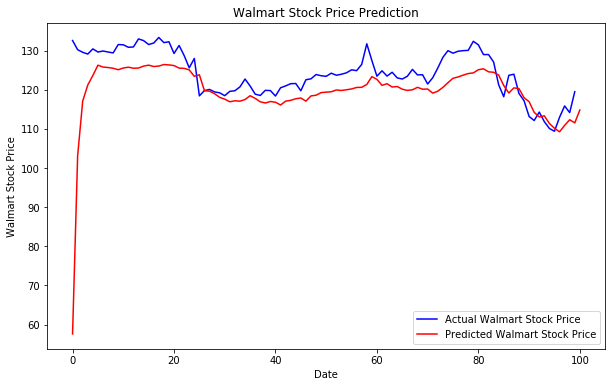

In [37]:
# Plot the results - model trained with 100 epochs 
plt.figure(figsize=(10,6))
plt.plot(WMT_testing_processed, color='blue', label='Actual Walmart Stock Price')
plt.plot(predictions , color='red', label='Predicted Walmart Stock Price')
plt.title('Walmart Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Walmart Stock Price')
plt.legend()
plt.show()

In [38]:
# Save the model - can be used later
model.save("Walmart_model_trained.h5")